## learning-AI101 : vehicle price regression (DL)
### 자동차 데이터를 Dense layer struction과 CNN을 통한 regression 수행

<br>

- **임규연 (lky473736)**
- 2024.08.15. ~ 2024.08.17.에 문서 작성
- **kaggle** : https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho
- **data abstract** : This dataset contains information about used cars. This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.


----
## <span id='dl'><mark>DL</mark></span>

deep learning으로 vehicle price를 regression한다. 목차는 아래와 같다.

- **1. 데이터 전처리**
- **2. deep learning 모델을 적용하여 regression**
    - **SGDRegressor를 이용한 regression 수행**
        - 여기서 Polynormial set과 normal set의 score를 비교한 후, 앞으로 이용할 dataset을 결정한다.
    - **2-1** : ANN
    - **2-2** : DNN
    - **2-3** : CNN

In [1]:
# 라이브러리 import

import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

2024-08-17 15:36:19.572359: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


------

### 1. 데이터 분석, 시각화 및 전처리
- 데이터 로드 및 필요한 정보, 기초통계량을 get한다.
- 결측치 제거, outlier 제거 등의 데이터 전처리를 수행한다.
- train set, test set, val set을 spilt 후 scaling 한다.

In [2]:
# 데이터 읽기 및 columns 확인

df = pd.read_csv ('data/vehicle/car details v4.csv')
print (df.columns)

df.head()

Index(['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel Type',
       'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine',
       'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height',
       'Seating Capacity', 'Fuel Tank Capacity'],
      dtype='object')


,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,Honda,Amaze 1.2 VX i-VTEC,505000,2017,87150,Petrol,Manual,Pune,Grey,First,Corporate,1198 cc,87 bhp @ 6000 rpm,109 Nm @ 4500 rpm,FWD,3990.0,1680.0,1505.0,5.0,35.0
1,Maruti Suzuki,Swift DZire VDI,450000,2014,75000,Diesel,Manual,Ludhiana,White,Second,Individual,1248 cc,74 bhp @ 4000 rpm,190 Nm @ 2000 rpm,FWD,3995.0,1695.0,1555.0,5.0,42.0
2,Hyundai,i10 Magna 1.2 Kappa2,220000,2011,67000,Petrol,Manual,Lucknow,Maroon,First,Individual,1197 cc,79 bhp @ 6000 rpm,112.7619 Nm @ 4000 rpm,FWD,3585.0,1595.0,1550.0,5.0,35.0
3,Toyota,Glanza G,799000,2019,37500,Petrol,Manual,Mangalore,Red,First,Individual,1197 cc,82 bhp @ 6000 rpm,113 Nm @ 4200 rpm,FWD,3995.0,1745.0,1510.0,5.0,37.0
4,Toyota,Innova 2.4 VX 7 STR [2016-2020],1950000,2018,69000,Diesel,Manual,Mumbai,Grey,First,Individual,2393 cc,148 bhp @ 3400 rpm,343 Nm @ 1400 rpm,RWD,4735.0,1830.0,1795.0,7.0,55.0


In [3]:
# 기초통계량 확인

df.describe()

,Price,Year,Kilometer,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
count,2.059000e+03,2059.000000,2.059000e+03,1995.000000,1995.000000,1995.000000,1995.000000,1946.000000
mean,1.702992e+06,2016.425449,5.422471e+04,4280.860652,1767.991980,1591.735338,5.306266,52.002210
std,2.419881e+06,3.363564,5.736172e+04,442.458507,135.265825,136.073956,0.822170,15.110198
min,4.900000e+04,1988.000000,0.000000e+00,3099.000000,1475.000000,1165.000000,2.000000,15.000000
25%,4.849990e+05,2014.000000,2.900000e+04,3985.000000,1695.000000,1485.000000,5.000000,41.250000
50%,8.250000e+05,2017.000000,5.000000e+04,4370.000000,1770.000000,1545.000000,5.000000,50.000000
75%,1.925000e+06,2019.000000,7.200000e+04,4629.000000,1831.500000,1675.000000,5.000000,60.000000
max,3.500000e+07,2022.000000,2.000000e+06,5569.000000,2220.000000,1995.000000,8.000000,105.000000


In [4]:
# 범주형 열마다의 component를 출력

'''
#   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Make                2059 non-null   object 
 1   Model               2059 non-null   object 
 2   Price               2059 non-null   int64  
 3   Year                2059 non-null   int64  
 4   Kilometer           2059 non-null   int64  
 5   Fuel Type           2059 non-null   object 
 6   Transmission        2059 non-null   object 
 7   Location            2059 non-null   object 
 8   Color               2059 non-null   object 
 9   Owner               2059 non-null   object 
 10  Seller Type         2059 non-null   object 
 11  Engine              1979 non-null   object 
 12  Max Power           1979 non-null   object 
 13  Max Torque          1979 non-null   object 
 14  Drivetrain          1923 non-null   object 
 15  Length              1995 non-null   float64
 16  Width               1995 non-null   float64
 17  Height              1995 non-null   float64
 18  Seating Capacity    1995 non-null   float64
 19  Fuel Tank Capacity  1946 non-null   float64
'''

for col_name in [feature for feature in df.columns if df[feature].dtype == 'object'] :
    print (f'col_name : {col_name} \ncompo : {df[col_name].unique()}')
    print ()

col_name : Make 
compo : ['Honda' 'Maruti Suzuki' 'Hyundai' 'Toyota' 'Mercedes-Benz' 'BMW' 'Skoda'
 'Nissan' 'Renault' 'Tata' 'Volkswagen' 'Ford' 'Audi' 'Mahindra' 'MG'
 'Jeep' 'Porsche' 'Kia' 'Land Rover' 'Volvo' 'Maserati' 'Jaguar' 'Isuzu'
 'Fiat' 'MINI' 'Ferrari' 'Mitsubishi' 'Datsun' 'Lamborghini' 'Chevrolet'
 'Ssangyong' 'Rolls-Royce' 'Lexus']

col_name : Model 
compo : ['Amaze 1.2 VX i-VTEC' 'Swift DZire VDI' 'i10 Magna 1.2 Kappa2' ...
 'Ritz Vxi (ABS) BS-IV' 'XUV500 W8 [2015-2017]'
 'Figo Duratec Petrol ZXI 1.2']

col_name : Fuel Type 
compo : ['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric' 'CNG + CNG' 'Hybrid'
 'Petrol + CNG' 'Petrol + LPG']

col_name : Transmission 
compo : ['Manual' 'Automatic']

col_name : Location 
compo : ['Pune' 'Ludhiana' 'Lucknow' 'Mangalore' 'Mumbai' 'Coimbatore' 'Bangalore'
 'Delhi' 'Raipur' 'Kanpur' 'Patna' 'Vadodara' 'Hyderabad' 'Yamunanagar'
 'Gurgaon' 'Jaipur' 'Deoghar' 'Agra' 'Goa' 'Warangal' 'Jalandhar' 'Noida'
 'Ahmedabad' 'Mohali' 'Navi Mumbai' 'Gha

In [5]:
# 결측치 확인

df.isnull().sum()

Make                    0
Model                   0
Price                   0
Year                    0
Kilometer               0
Fuel Type               0
Transmission            0
Location                0
Color                   0
Owner                   0
Seller Type             0
Engine                 80
Max Power              80
Max Torque             80
Drivetrain            136
Length                 64
Width                  64
Height                 64
Seating Capacity       64
Fuel Tank Capacity    113
dtype: int64

In [6]:
# 결측치 대체 
# 연속형 col에는 평균값으로 채우기
# 범주형 col에는 Missing이라는 새로운 값 지정하기

categorical = df.select_dtypes(include=['object']).columns # 범주형 col (object)
numerical = df.select_dtypes(include=[np.number]).columns # 연속형 col (int32, float32)

print (categorical, numerical)

df[categorical] = df[categorical].fillna('Missing') # Missing 채우기
df[numerical] = df[numerical].fillna(df[numerical].mean()) # 평균 채우기

print (df.isnull().sum())

Index(['Make', 'Model', 'Fuel Type', 'Transmission', 'Location', 'Color',
       'Owner', 'Seller Type', 'Engine', 'Max Power', 'Max Torque',
       'Drivetrain'],
      dtype='object') Index(['Price', 'Year', 'Kilometer', 'Length', 'Width', 'Height',
       'Seating Capacity', 'Fuel Tank Capacity'],
      dtype='object')
Make                  0
Model                 0
Price                 0
Year                  0
Kilometer             0
Fuel Type             0
Transmission          0
Location              0
Color                 0
Owner                 0
Seller Type           0
Engine                0
Max Power             0
Max Torque            0
Drivetrain            0
Length                0
Width                 0
Height                0
Seating Capacity      0
Fuel Tank Capacity    0
dtype: int64


In [7]:
# Engine, Max Power, Max Torque 전처리

col_list = ['Engine', 'Max Power', 'Max Torque']

for i in range (df.shape[0]) :
    # print (df.iloc[i])
        
    for j in range (len(col_list)) :
        component = df.at[i, col_list[j]]
        
        # print (f'{i} | {col_list[j]} : {component}')
        
        if component != 'Missing' : # 결측치가 아니라면
#             if 'cc' in component :  # Engine
#                 df.at[i, col_list[j]] = float(component.split()[0])
            
#             else : # Max Power 혹은 Max Torque
#                 if 'rpm' in component : # 320 Nm @ 1750 rpm
#                     df.at[i, col_list[j]] = float(component.split()[0])
                    
#                 else : # 320@1750
#                     df.at[i, col_list[j]] = float(component.split('@')[0])

            # parsing algorithm 사용
            
            current_ind = 0
            current_num = ''
            
            while True : 
                if component[current_ind] not in [' ', '@'] and current_ind < len(component) :
                    current_num += component[current_ind]
                    
                else : 
                    break
                    
                current_ind += 1
                    
            # print (current_num)
            
            df.at[i, col_list[j]] = float(current_num)
            
        else : 
            df.at[i, col_list[j]] = None
            
# float32로 dtype 변경
for feature in col_list : 
    df[feature] = df[feature].astype(float)
            
# 결측치 처리
df = df.fillna({
    'Engine': df['Length'].mean(),
    'Max Power': df['Max Power'].mean(),
    'Max Torque': df['Max Torque'].mean()
})

df.iloc[0]

Make                                Honda
Model                 Amaze 1.2 VX i-VTEC
Price                              505000
Year                                 2017
Kilometer                           87150
Fuel Type                          Petrol
Transmission                       Manual
Location                             Pune
Color                                Grey
Owner                               First
Seller Type                     Corporate
Engine                             1198.0
Max Power                            87.0
Max Torque                          109.0
Drivetrain                            FWD
Length                             3990.0
Width                              1680.0
Height                             1505.0
Seating Capacity                      5.0
Fuel Tank Capacity                   35.0
Name: 0, dtype: object

In [8]:
# 나머지 열은 label encoding

from sklearn.preprocessing import LabelEncoder

categorical = df.select_dtypes(include=['object']).columns
print (categorical)

for col in categorical :
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

df.head()

Index(['Make', 'Model', 'Fuel Type', 'Transmission', 'Location', 'Color',
       'Owner', 'Seller Type', 'Drivetrain'],
      dtype='object')


,Make,Model,Price,Year,Kilometer,Fuel Type,Transmission,Location,Color,Owner,Seller Type,Engine,Max Power,Max Torque,Drivetrain,Length,Width,Height,Seating Capacity,Fuel Tank Capacity
0,7,106,505000,2017,87150,6,1,56,7,1,1,1198.0,87.0,109.0000,1,3990.0,1680.0,1505.0,5.0,35.0
1,19,802,450000,2014,75000,2,1,40,15,3,2,1248.0,74.0,190.0000,1,3995.0,1695.0,1555.0,5.0,42.0
2,8,1030,220000,2011,67000,6,1,39,8,1,2,1197.0,79.0,112.7619,1,3585.0,1595.0,1550.0,5.0,35.0
3,30,492,799000,2019,37500,6,1,41,13,1,2,1197.0,82.0,113.0000,1,3995.0,1745.0,1510.0,5.0,37.0
4,30,548,1950000,2018,69000,2,1,45,7,1,2,2393.0,148.0,343.0000,3,4735.0,1830.0,1795.0,7.0,55.0


In [9]:
# input, target set으로 split

print (df.columns)

vehicle_target = df['Price']
vehicle_input = df.drop(columns=['Price'])

print (vehicle_input.shape, vehicle_target.shape)

Index(['Make', 'Model', 'Price', 'Year', 'Kilometer', 'Fuel Type',
       'Transmission', 'Location', 'Color', 'Owner', 'Seller Type', 'Engine',
       'Max Power', 'Max Torque', 'Drivetrain', 'Length', 'Width', 'Height',
       'Seating Capacity', 'Fuel Tank Capacity'],
      dtype='object')
(2059, 19) (2059,)


In [10]:
# train, test, val set으로 split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(vehicle_input,
                                                   vehicle_target, 
                                                   test_size=0.2)

X_train, X_val, y_train, y_val = train_test_split(X_train,
                                                  y_train, 
                                                  test_size=0.2)

print (X_train.shape, X_test.shape, X_val.shape)

(1317, 19) (412, 19) (330, 19)


In [11]:
# scaling

from sklearn.preprocessing import StandardScaler

z_normal = StandardScaler()
X_train_scaled = z_normal.fit_transform(X_train)
X_test_scaled = z_normal.transform(X_test)
X_val_scaled = z_normal.transform(X_val)

-------

### 2. deep learning 모델을 적용하여 regression
deep learning을 진행한다. 아래와 같은 순서로 진행한다.

- deep learning 전, SGDRegressor를 통한 regression 진행
- (1) ANN
- (2) DNN
- (3) CNN

#### (2-1) SGDRegressor 통한 ML에서의 확률적 경사 하강법 적용
deep learning을 하기 전, deep learning의 weight 및 bias 조정법인 **SGD (Stochastic Gradient Descent)** 를 scikit-learn으로 구현해본다. parameter는 random search를 통하여 최적화할 것이며, 자세한 조정범위는 아래에 서술한다.
```python
param = {
    'loss': ['squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
    'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'max_iter': randint(1, 101),
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
}

```

In [12]:
# random search를 통한 hyperparameter tuning

from sklearn.linear_model import SGDRegressor
from scipy.stats import randint, uniform
from sklearn.model_selection import RandomizedSearchCV

param = {
    'loss': ['squared_error', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
    'alpha': [1e-4, 1e-3, 1e-2, 1e-1, 1],
    'penalty': ['l2', 'l1', 'elasticnet'],
    'max_iter': randint(1, 101),
    'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
}

sr = SGDRegressor()

# normal set
rs1 = RandomizedSearchCV(sr, param, n_iter=25, cv=3, n_jobs=-1)
rs1.fit (X_train_scaled, y_train)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration re

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/linear_model/_stochastic_gradient.py:1561: ConvergenceWarning: Maximum number of iteration re

RandomizedSearchCV(cv=3, estimator=SGDRegressor(), n_iter=25, n_jobs=-1,
                   param_distributions={'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
                                        'learning_rate': ['constant', 'optimal',
                                                          'invscaling',
                                                          'adaptive'],
                                        'loss': ['squared_error', 'huber',
                                                 'epsilon_insensitive',
                                                 'squared_epsilon_insensitive'],
                                        'max_iter': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x14c75bb90>,
                                        'penalty': ['l2', 'l1', 'elasticnet']})

In [13]:
# best score, best model, train score, test score

sr1 = rs1.best_estimator_
print ("***** normal set score *****")
print ("best score : ", rs1.best_score_)
print ("best estimator (model) : ", sr1)

sr1_score = [sr1.score(X_train_scaled, y_train), sr1.score(X_test_scaled, y_test), 
            sr1.score(X_val_scaled, y_val)]
print (f"train score, test score, val score : {sr1_score}")

***** normal set score *****
best score :  0.7034785120071329
best estimator (model) :  SGDRegressor(alpha=0.1, learning_rate='adaptive', max_iter=68, penalty='l1')
train score, test score, val score : [0.7348560445521879, 0.6816001220032252, 0.5207693723302789]


점수가 만족스럽지 않다. 그에 대한 근거를 말해보자면...

- overfitting 되어 있다. 결정계수가 그리 높은 수치가 아니다. 제대로 된 학습이 이루어지지 않았다. 또한 train score과 test score의 차이가 많이 벌어진다.
- 원인 분석
    - 데이터의 feature가 부족하거나 **model이 데이터를 제대로 분석하지 못할 정도로 복잡도가 낮을 수도 있다.**
    - 현재 alpha가 0.1로 매우 높은 규제 수치인데, 규제가 높다면 모델이 단순해져 feature의 패턴을 제대로 파악하지 못할 수도 있다.
    - **RandomForestRegressor 또한 적용해본 후에 deep learning을 들어가자.**

In [14]:
# RandomForestRegressor를 도입 + random search 사용

from sklearn.ensemble import RandomForestRegressor

param = {
    'n_estimators' : randint(100, 1000),             
    'max_depth' : randint(10, 100),                    
    'min_samples_split' : randint(2, 20),              
    'min_samples_leaf' : randint(1, 10),               
    'max_features' : ['sqrt', 'log2', None],   
    'bootstrap' : [True, False]                       
}

rf = RandomForestRegressor(random_state=42)
rs2 = RandomizedSearchCV(
    rf,
    param,
    n_iter=100,                
    cv=5,
    verbose=2,                 # 진행 상태를 출력
    n_jobs=-1             
)

rs2.fit(X_train_scaled, y_train)

sr2 = rs2.best_estimator_
print ("***** normal set score (random forest regressor) *****")
print ("best score : ", rs2.best_score_)
print ("best estimator (model) : ", sr2)

sr2_score = [sr2.score(X_train_scaled, y_train), sr2.score(X_test_scaled, y_test), 
            sr2.score(X_val_scaled, y_val)]
print (f"train score, test score, val score : {sr2_score}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
***** normal set score (random forest regressor) *****
best score :  0.8565817403139897
best estimator (model) :  RandomForestRegressor(bootstrap=False, max_depth=68, max_features='log2',
                      min_samples_split=3, n_estimators=519, random_state=42)
train score, test score, val score : [0.9989071937404261, 0.821711923394892, 0.8489144652780101]


**나의 예상이 맞았다.** train score와 test score, val score가 전반적으로 매우 상승하였으며, 서로 간의 대소 관계가 적절히 이루어졌다. 예전 SGDRegressor 모델이 간단해서, (혹은 hyperparameter 조정이 그리 많지 않아) feature들 간의 패턴을 제대로 파악하지 못했나 보다. **다만, overfitting을 막지는 못하였다.** deep learning이 기대되는 순간이다.

#### (2-2)  ANN (fully connected)
- hidden layer를 구성하지 않고, 입력층과 출력층만 존재하는 인공신경망을 struction할 것이다.
- 기존 train set에서 validation set을 하나 더 구성하였고, 추후 evaluation에 사용할 예정이다.
- 출력층의 activation을 사용하지 않는다. (regression이기 때문에)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 19)                0         
                                                                 
 dense (Dense)               (None, 32)                640       
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 673 (2.63 KB)
Trainable params: 673 (2.63 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


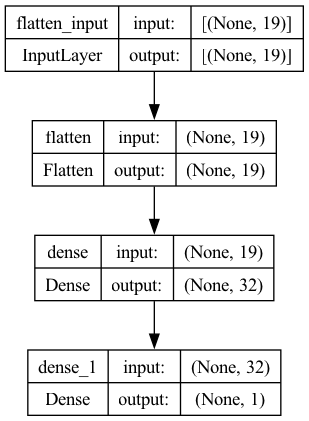

In [15]:
# modelling

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(19, )), 
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

model.summary()
keras.utils.plot_model(model, show_shapes=True)

In [16]:
# compile

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [17]:
# fit

history = model.fit(X_train_scaled, y_train, epochs=1000, 
                   validation_data=(X_val_scaled, y_val), verbose=0)

for key in history.history.keys() : 
    print (f"************ {key} ************")
    print (history.history[key])
    print ()
    
model.get_metrics_result

************ loss ************
[7742831460352.0, 7742827266048.0, 7742819926016.0, 7742812585984.0, 7742797905920.0, 7742779031552.0, 7742755438592.0, 7742727651328.0, 7742695145472.0, 7742658445312.0, 7742615977984.0, 7742567219200.0, 7742517411840.0, 7742459740160.0, 7742398398464.0, 7742333386752.0, 7742262083584.0, 7742186586112.0, 7742110564352.0, 7742023532544.0, 7741935452160.0, 7741840031744.0, 7741738844160.0, 7741637132288.0, 7741527031808.0, 7741416931328.0, 7741299490816.0, 7741177856000.0, 7741054648320.0, 7740920954880.0, 7740787261440.0, 7740641509376.0, 7740500475904.0, 7740353675264.0, 7740202156032.0, 7740048015360.0, 7739893874688.0, 7739737112576.0, 7739567767552.0, 7739401568256.0, 7739223834624.0, 7739052392448.0, 7738868367360.0, 7738686439424.0, 7738499792896.0, 7738303184896.0, 7738109198336.0, 7737913638912.0, 7737706545152.0, 7737503645696.0, 7737290784768.0, 7737073729536.0, 7736856150016.0, 7736636997632.0, 7736416796672.0, 7736196595712.0, 7735971676160.0,

<bound method Model.get_metrics_result of <keras.src.engine.sequential.Sequential object at 0x14ce91610>>

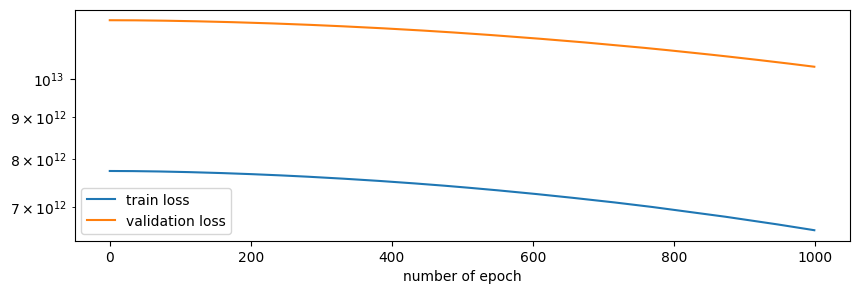

In [18]:
# loss 시각화

plt.figure(figsize=(10, 3))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('number of epoch')
plt.yscale('log')
plt.legend (['train loss', 'validation loss'])
plt.show() 

**역시, 엄청난 loss가 나온다.** 그 이유는 직관적으로 보기만 해도 간단히 알 수 있는데,

- parameter의 갯수를 확인해보자. 당연히 저 양의 weight와 bias만으로 19개의 feature의 pattern을 파악할 수 있다는 게 말이 안된다.
- **그래도 loss는 점점 줄어들고 있다.**
- 현재 dataset의 각 열은 범주형 데이터 (label encoder로 encoding 함), 실수형 데이터가 섞여있는 복잡성 높고 극값이 많다. 따라서 겨우 1개의 hidden layer를 가진 ANN으로는 이 복잡성을 잡을 수는 없을 것이다.
- **위 figure의 loss 곡선은 아래로 tightly decrease, 즉 위로 볼록한 곡선을 띄면서 감소하고 있다.**
    - 위로 볼록한 형태로 감소한다면 이는 dataset의 복잡도가 워낙 높아, 초기에는 loss가 줄어들지 않다가 학습 중반부터 pattern을 파악하였다는 의미라고 추측된다.
    - DNN에서 parameter를 최소한 3000개 정도로 setting하여 학습해보자.

In [19]:
# evaluate

model.evaluate(X_val_scaled, y_val)

11/11 [==============================] - 0s 976us/step - loss: 10356440170496.0000 - mae: 1620457.7500


[10356440170496.0, 1620457.75]



#### (2-3) DNN 
- hidden layer을 충분히 구성하여 신경망을 struction할 것임
    - parameter는 최소한 3000개 이상으로 증폭, 각 node의 activation은 relu 사용
    - epoch는 1000으로 고정
- 아래와 같이 experiment할 예정이다.
    - optimizer는 **적응형 학습율 optimizer인 adam을 사용한다.**
    - validation loss 감소를 위하여 **dropout 층을 추가한다.**

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 19)                0         
                                                                 
 dense_2 (Dense)             (None, 128)               2560      
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dropout (Dropout)           (None, 64)               

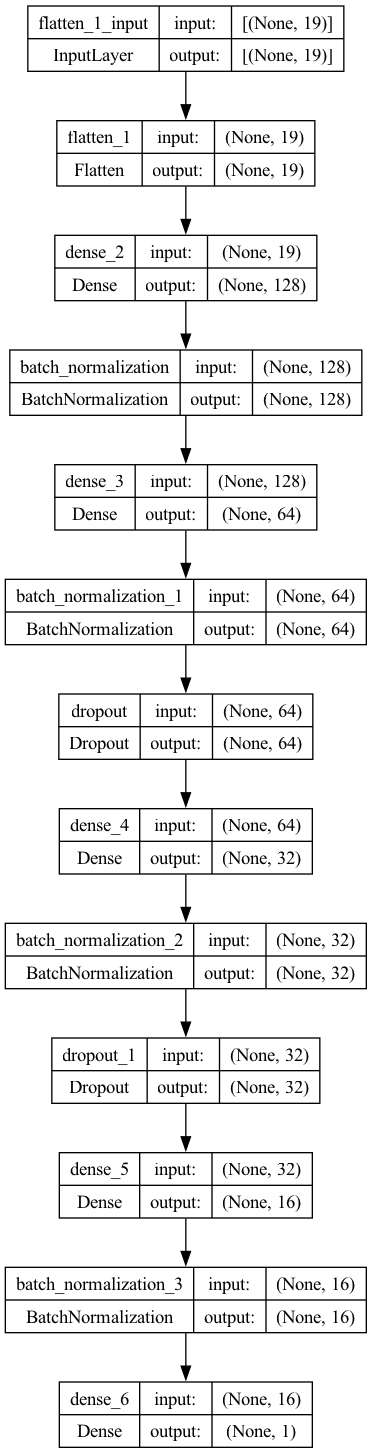

In [20]:
# modelling DNN

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(19, )),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(16, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(1)
])


model.summary()
keras.utils.plot_model(model, show_shapes=True)

In [21]:
# compile

optimizer = keras.optimizers.Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='mean_squared_error')

In [22]:
# callback 설정 및 fit

history = model.fit(X_train_scaled, y_train, epochs=1000, 
                    validation_data=(X_val_scaled, y_val), verbose=0)

for key in history.history.keys() : 
    print (f"************ {key} ************")
    print (history.history[key])
    print ()

************ loss ************
[7742805245952.0, 7742714019840.0, 7742544150528.0, 7742284103680.0, 7741928112128.0, 7741477748736.0, 7740932489216.0, 7740257730560.0, 7739539980288.0, 7738699546624.0, 7737811402752.0, 7736825217024.0, 7735795515392.0, 7734491611136.0, 7733321924608.0, 7732048429056.0, 7730506498048.0, 7728900603904.0, 7727503900672.0, 7725785808896.0, 7724179914752.0, 7722416209920.0, 7720201093120.0, 7718370279424.0, 7716305633280.0, 7714046476288.0, 7712134922240.0, 7709555425280.0, 7707490779136.0, 7705648955392.0, 7702359572480.0, 7700136067072.0, 7697111449600.0, 7694179631104.0, 7691985485824.0, 7689383968768.0, 7686371409920.0, 7682963537920.0, 7680851181568.0, 7677474242560.0, 7673383747584.0, 7670579855360.0, 7668314931200.0, 7664253272064.0, 7661554761728.0, 7658890330112.0, 7655223984128.0, 7651402448896.0, 7645997563904.0, 7644755001344.0, 7641435734016.0, 7638735650816.0, 7632794419200.0, 7630142046208.0, 7625569206272.0, 7621839421440.0, 7617068924928.0,

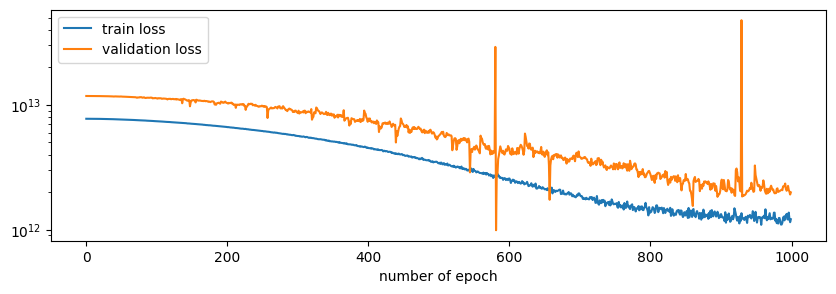

In [23]:
# loss 시각화

plt.figure(figsize=(10, 3))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('number of epoch')
plt.yscale('log')
plt.legend (['train loss', 'validation loss'])
plt.show() 


#### (2-4) CNN (2D)
- convolution을 통하여 중요한 feature만 도드라지게 하여 학습을 진행한다.
- 일단은, CNN을 여기에 적용하기엔 부적합할 수 있다. 하지만 진행해보자면...
    - 3차원 tensor로 전환하여 Conv2D layer로 convolution을 시행할 수 있을 것 같다. 아래와 같이 전환한다.
        - 배치 크기 : row의 갯수
        - 세로 : 1 (관계형 데이터 csv이기 때문에 한 row를 기준으로)
        - 가로 : feature의 갯수 (col의 갯수)
        - 채널 : 1 (데이터를 단일 채널이라고 가정)
    - 전환 후 CNN 2d를 적용하여 main feature extraction 후 pooling을 진행한다.
    - Conv, pooling을 2번 반복 후 dense layer를 두어 regression한다.
        - 중간에 dropout 층을 배치하여 overfitting을 막고 학습에 신중하도록 한다.
- overfitting을 막기 위하여, DNN에서 했던 것과 같이 early stopping 콜백을 설치하려고 했으나, 충분한 학습을 한 후 loss 추이를 확인하기 위하여 콜백을 두지 않겠다.

In [24]:
X_train_cnn = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1], 1))
X_test_cnn = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1], 1))
X_val_cnn = X_val_scaled.reshape((X_val_scaled.shape[0], 1, X_val_scaled.shape[1], 1))

In [25]:
# shape 확인

X_train_cnn.shape, X_test_cnn.shape, X_val_cnn.shape

((1317, 1, 19, 1), (412, 1, 19, 1), (330, 1, 19, 1))

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1, 19, 1)]        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 1, 19, 64)         256       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 1, 9, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 1, 9, 32)          6176      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 1, 4, 32)          0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 128)               0   

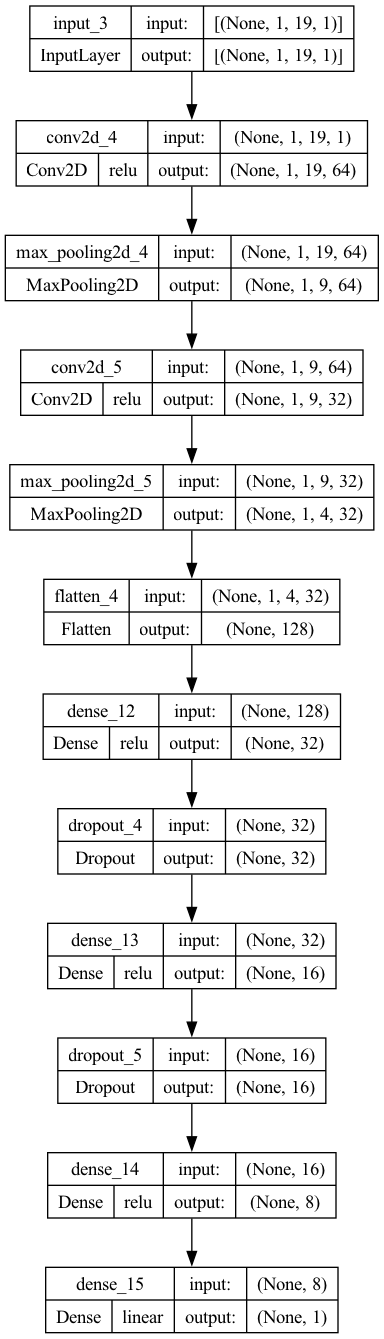

In [32]:
# modelling (functional API 방식)

input_layer = keras.Input(shape=(1, 19, 1))
conv_1 = keras.layers.Conv2D(64, kernel_size=(1, 3), activation='relu', padding='same')(input_layer)
pooling_1 = keras.layers.MaxPooling2D((1, 2))(conv_1)
conv_2 = keras.layers.Conv2D(32, kernel_size=(1, 3), activation='relu', padding='same')(pooling_1)
pooling_2 = keras.layers.MaxPooling2D((1, 2))(conv_2)
flatten = keras.layers.Flatten()(pooling_2)
dense_1 = keras.layers.Dense(32, activation='relu') (flatten)
dropout_1 = keras.layers.Dropout(0.4) (dense_1)
dense_2 = keras.layers.Dense(16, activation='relu') (dropout_1)
dropout_2 = keras.layers.Dropout(0.3) (dense_2)
dense_3 = keras.layers.Dense(8, activation='relu') (dropout_2)
output_layer = keras.layers.Dense(1, activation='linear') (dense_3)

# model = keras.Model(
#     input_layer,
#     conv_1,
#     pooling_1,
#     conv_2,
#     pooling_2,
#     flatten,
#     dense_1,
#     dropout_1,
#     dense_2,
#     dropout_2,
#     dense_3,
#     output_layer
# )

model = keras.Model(inputs=input_layer, outputs=output_layer)

model.summary()
keras.utils.plot_model(model, show_shapes=True, show_layer_activations=True)

In [33]:
# compile

adam = keras.optimizers.Adam(learning_rate=0.001)
model.compile (optimizer=adam, loss='mse', metrics=['mae'])

In [34]:
# fit (충분한 학습을 하기 위하여 조기 종료 콜백을 넣지 않아보겠다)

# early_stopping_cb = keras.callbacks.EarlyStopping(patience=10, 
#                                                 restore_best_weights=True)

history = model.fit(X_train_cnn, y_train, epochs=1000, 
                    validation_data=(X_val_cnn, y_val),
                    # callbacks=early_stopping_cb, 
                    verbose=0)

13/13 [==============================] - 0s 2ms/step - loss: 1557097349120.0000 - mae: 531748.5625


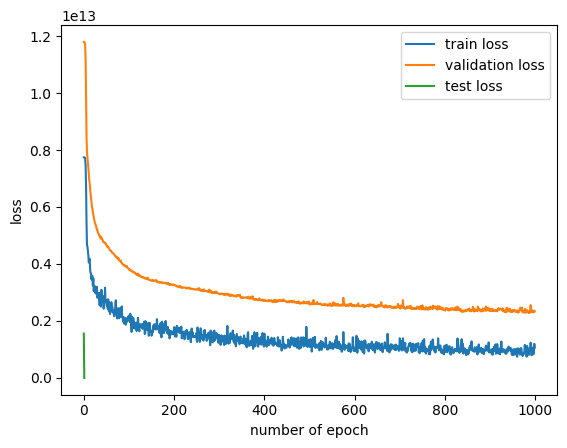

In [44]:
# loss 시각화

test_loss = model.evaluate(X_test_cnn, y_test)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('number of epoch')
plt.ylabel('loss')
plt.legend (['train loss', 'validation loss', 'test loss'])
plt.show() 